# Image processing

by [Richard Tsai](https://www.researchgate.net/profile/Richard_Tsai3)

We will look at denoising of images to which noise is added.

# Denoising

In 1D: we have the noisy data $f_j$ which we assume to be "sampled" from a function $f(x)$  on a uniform grid.
**$f$ may have discontinuities.**
We want to compute a grid function (i.e. a vector), $u$, which approximate $f$ well.

We assume that $u$ and $f$ are periodic.

The following is a basic form of the Rudin-Osher-Fatemi denoising model:

$$ \min_{u\in \mathbb{R}^d} E_{ROF}(u_1,u_2,\cdots,u_{N}), $$
with periodic boundary conditions: $u_1=u_{N}$ and $f_1=f_{N}$.


$$ E_{ROF}(u_1,u_2,\cdots,u_{N}):=\lambda\sum_{j=1}^{N-1} \frac{|u_{j+1}-u_j|}{h} h + \frac{1}{2}\sum_{j=1}^{N} (u_j-f_j)^2 h $$ 


The first term is called **the total variation** of $u$.


**Problem:**

1. Derive $\nabla E_{ROF}$. 
2. Write a piece of code, using the templates provided below, performing gradient descent on $E_{ROF}$ in order to find a minimum of $E_{ROF}$. The gradient descent can equation is defined as the following:

$$ U^{(n+1)}:=U^{(n)}-\Delta t\nabla E_{ROF}(U^{(k)}), $$ 

where $U^{(k)} = (u_1^{(k)},u_2^{(k)},\cdots, u_{N}^{(k)})^\top$.
3. Run the algorithm with `f=F1` and `F2` defined below, using $U^{(0)}=(f_1,f_2,\cdots,f_{N-1})^\top$, $\lambda=0.01, 0.1$ for $10,000$ iterations. Report the solutions that you get.
4. Replacing $E_{ROF}$ by $E_{Laplace}$ defined below:

$$ E_{Laplace}(u_1,u_2,\cdots,u_{N}):=\lambda\sum_{j=1}^{N} \frac{1}{2}\frac{|u_{j+1}-u_j|^2}{h^2} h + \frac{1}{2}\sum_{j=1}^{N} 
(u_j-f_j)^2 h.$$ 

Derive the equations satisfied by the critical point of $E_{Laplace}$. Solve the resultign equations by Conjugate Gradient method, with $\lambda=0.01, 0.1$. Compare the solutions to the one obtained in 3. 

The data, `F1` and `F2`, have different charcteristics. For each of teh data, what method would you recommend?

#### 1)

$$\nabla E_{ROF} = \begin{bmatrix}
           \frac{\partial E}{\partial u_{1}} \\
           \frac{\partial E}{\partial u_{2}} \\
           \vdots \\
           \frac{\partial E}{\partial u_{N}} \\
         \end{bmatrix} $$

Where $$ \frac{\partial E}{\partial u_{i}} = \lambda (\text{sign}(u_i - u_{i+1}) + \text{sign}(u_i - u_{i-1}))+  h(u_j-f_j )$$

When $$ 1 < i < n $$ This is because we are considering the absolute value function $$\lambda|u_{i+1}-u_{i}|$$ If the inside of the absolute is positive, then we will take the normal gradient of $$\lambda(u_{i+1}-u_{i})$$ If it is negative, we must negate it, i.e., find the gradient of $$\lambda(u_{i}-u_{i-1})$$ 

Otherwise:

$$ \frac{\partial E}{\partial u_{1}} = \lambda (\text{sign}(u_1 - u_2) + \text{sign}(u_1 - u_{N-1})) + h\cdot (u_{1}-f_{1}) $$
  
$$ \frac{\partial E}{\partial u_{n}} = \lambda (\text{sign}(u_N - u_{N-1}) + \text{sign}(u_N-u_2)) + h\cdot (u_{n}-f_{n}) $$

Because we are assuming our function is periodic - $$u_1 = u_N \Rightarrow u_0 = u_{N-1} \text{ and } u_{N+1} = u_2$$

In [40]:
function ROF_gradient_descent_step!(U,Unew, f, h, Δt, λ)
    epsilon = 1e-3
    N = size(Unew,1)
#     for i = 1:N
#         if i == N
#             next_ = U[2]
#         else
#             next_ = U[i+1]
#         end
#         if i == 1
#             prev_ = U[N-1]
#         else
#             prev_ = U[i-1]
#         end
#         grad = λ*(sign(U[i]-next_) + sign(U[i]-prev_)) + h*(U[i]-f[i])
#         Unew[i] .= U[i] - Δt*grad
#     end
    for i = 1:N
        if i == N
            next_ = U[2]
        else
            next_ = U[i+1]
        end
        if i == 1
            prev_ = U[N-1]
        else
            prev_ = U[i-1]
        end
        z1 = next_ - U[i]
        z2 = U[i] - prev_
        grad = λ*(z2/sqrt(z2^2+epsilon^2) - z1/sqrt(z1^2+epsilon^2)) + h*(U[i]-f[i])
        Unew[i] = U[i] - Δt * grad
    end
        
    
    
#     E_ROF = 0
#     for i = 1:n-1
#         E_ROF += λ * (Unew[i+1]-Unew[i])
#     end
    
#     for i = 1:n
#         E_ROF += .5 * (Unew[i]-f[i])^2*h
#     end
#     println(E_ROF)
end


# function Laplace_gradient_descent_step!(U,Unew, f, h, Δt, λ)
  
# end

ROF_gradient_descent_step! (generic function with 1 method)

In [2]:
using PyPlot

In [43]:
println(U)
println()
println(F)

[0.224712, 0.224713, 0.225089, 0.225916, 0.227477, 0.230812, 0.246868, 0.285572, 0.31973, 0.344141, 0.349276, 0.351123, 0.352547, 0.353408, 0.353921, 0.354197, 0.354187, 0.353898, 0.353317, 0.352215, -0.170759, -0.17989, -0.21517, -0.244061, -0.256255, -0.288068, -0.310658, -0.344192, -0.37665, -0.407303, -0.426981, -0.473846, -0.500662, -0.543079, -0.55512, -0.557389, -0.558408, -0.558939, -0.558998, -0.558489, -0.28436, -0.283283, -0.282565, -0.282035, -0.281601, -0.281176, -0.280679, -0.280034, -0.279132, -0.277818, 0.237296, 0.264829, 0.268633, 0.276261, 0.310093, 0.318661, 0.32461, 0.352779, 0.386738, 0.402001, 0.417667, 0.460416, 0.476584, 0.514735, 0.543838, 0.585855, 0.620978, 0.676567, 0.692657, 0.735273, 0.785297, 0.824734, 0.864022, 0.872135, 0.91323, 0.939103, 0.956743, 0.968576, 0.971334, 0.973268, 0.974451, 0.975201, 0.975619, 0.975849, 0.975871, 0.975682, 0.975194, 0.974471, 0.973211, 0.969918, 0.955478, 0.347076, 0.309202, 0.283588, 0.258474, 0.238935, 0.22816, 0.226225

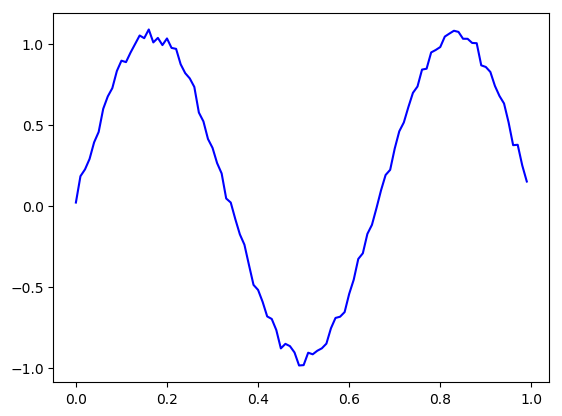

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000023FD3358>

In [27]:
plot(x,F,"b")

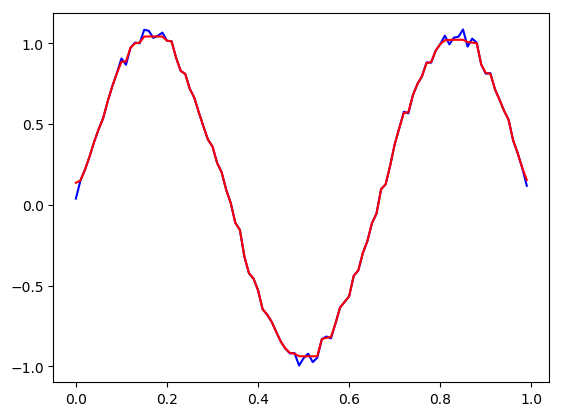

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000034CF4048>

In [41]:
n=100
x=linspace(0.0,1.0-1/n,n)

F1=sin.(3π.*x)+0.1*rand(n)
F2=(convert.(Float64, abs.(x-0.35).>0.15))-(convert.(Float64, abs.(x-0.65).>0.25))+0.1*rand(n)

F=F1
plot(x, F,"b")


U=copy(F);
Unew=copy(U)

h=1/n
dt=h^2

for t=1:5e4

   ROF_gradient_descent_step!(U,Unew, F, h, dt, 0.01) 

   U.=Unew
end

plot(x, U,"r")

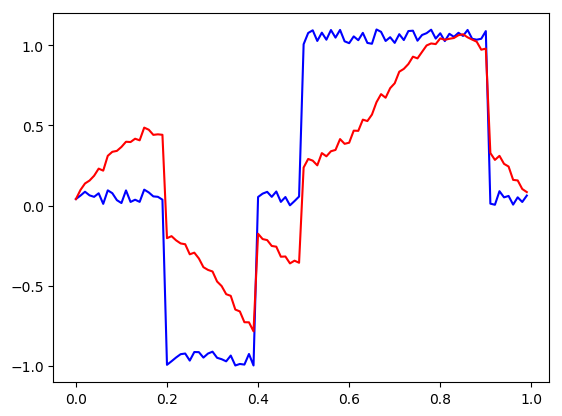

[0.0399239, 0.0969591, 0.137812, 0.156097, 0.186008, 0.230583, 0.217933, 0.310501, 0.335558, 0.341378, 0.366036, 0.398481, 0.39659, 0.417354, 0.407385, 0.486682, 0.473622, 0.441491, 0.444814, 0.441891, -0.203904, -0.191297, -0.217459, -0.236822, -0.241787, -0.30469, -0.294425, -0.330636, -0.385145, -0.402051, -0.411984, -0.474677, -0.503135, -0.553789, -0.564223, -0.649834, -0.661552, -0.728945, -0.729505, -0.785915, -0.176316, -0.209421, -0.215979, -0.252461, -0.257095, -0.319694, -0.318316, -0.361471, -0.344467, -0.357464, 0.237453, 0.290945, 0.280393, 0.251065, 0.327587, 0.307467, 0.339198, 0.347314, 0.415089, 0.385484, 0.392509, 0.467779, 0.466539, 0.5365, 0.527765, 0.568145, 0.645449, 0.695841, 0.673396, 0.733095, 0.763886, 0.836011, 0.853703, 0.884006, 0.929868, 0.919194, 0.959806, 0.999977, 1.01247, 1.00845, 1.04416, 1.03527, 1.04166, 1.04654, 1.06414, 1.0698, 1.05075, 1.0367, 1.02347, 0.973514, 0.980324, 0.328019, 0.285039, 0.310433, 0.260395, 0.243669, 0.160275, 0.156802, 0.10

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000350B95F8>

In [44]:
U=copy(F2);
Unew=copy(U)
plot(x, U,"b")
h=1/n
dt=h^2

for t=1:5e5
   ROF_gradient_descent_step!(U,Unew, F, h, dt, 0.000001) 

   U.=Unew
end

print(Unew)

plot(x, U,"r")

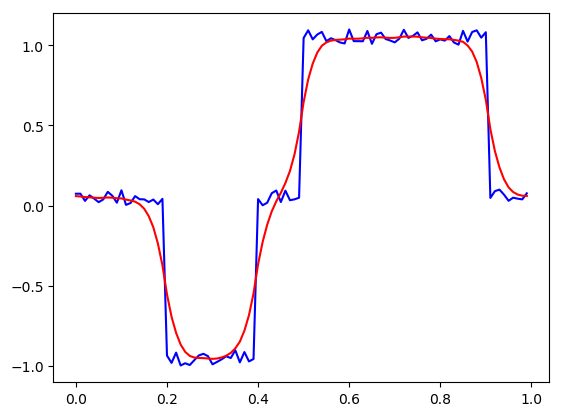

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x140ac8f90>

In [13]:
F=F2

plot(x, F,"b")


U=copy(F);
Unew=copy(U)

h=1/n
dt=h^2

for t=1:500000

   Laplace_gradient_descent_step!(U,Unew, F, h, dt, 0.001) 

   U.=Unew
end


plot(x, U,"r")

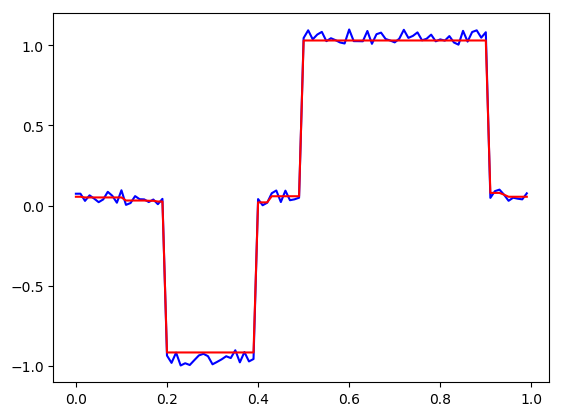

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x140fdd8d0>

In [14]:
F=F2

plot(x, F,"b")


U=copy(F);
Unew=copy(U)

h=1/n
dt=h^2

for t=1:500000
   ROF_gradient_descent_step!(U,Unew, F, h, dt, 0.01) 

   U.=Unew
end


plot(x, U,"r")

## Denoising of images

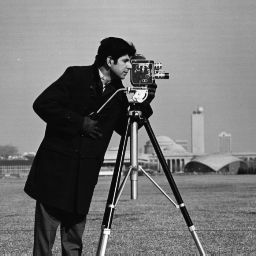

In [17]:
using Images

img=load("cameraman.png")


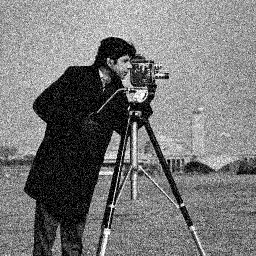

In [18]:
#convert the image to a 2D array of floating points and to add Gaussian noise to the image.
f0=convert(Array{Float64}, img)+0.1*randn(size(img));

#To view the matrix f0 as a gray scale image:
colorview(Gray, f0)


## A 2D anisotropic ROF model

$$ E_{aROF}(\{u_{i,j}\}):=  \lambda\sum_{i=1}^N\sum_{j=1}^{N} (|u_{i,j+1}-u_{i,j}|+|u_{i+1,j}-u_{i,j}|)h + \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^{N} (u_{i,j}-f_{i,j})^2 h^2 $$

$$ E_{Laplace}(\{u_{i,j}\}):=  \lambda\sum_{i=1}^N\sum_{j=1}^{N} (|u_{i,j+1}-u_{i,j}|^2+|u_{i+1,j}-u_{i,j}|^2) + \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^{N} (u_{i,j}-f_{i,j})^2 h^2 $$

Periodic boundary conditions: $u_{i,N+1}=u_{i,1}, i=1,2,\cdots,N$ and $u_{N+1,j}=u_{1,j}, j=1,2,\cdots,N$ 

**Problem:**
Download the file "cameraman.png" from the same GitHub repositor
1. Derive the gradient of the energy, $E_{aROF}$, analytically.
2. Follow the templates provided below, write a piece of code to compute gradient descent of $E_{aROF}$, and use your code to denoise the image.
3. Do the above two steps for $E_{Laplace}$.
4. For noisy images like the one we created, which model generate "better" result?

In [3]:
function aROF2D_gradient_descent_step!(U,Unew, f, h, Δt, λ)
    M,N=size(U)
    RHS=0.0
    hh=h^2
    λh=λ*h
    
    Sgn=z->z/abs(z+1e-12)
    
    for j in 1:N, i in 1:M 
        #a lazy way for dealing with periodic boudnaries
        ip1=(i<M?i+1:1)
        im1=(i>1?i-1:M)
        jp1=(j<N?j+1:1)
        jm1=(j>1?j-1:N)
        
        RHS = #fill in the right hand side
        Unew[i,j]=U[i,j]+Δt*RHS 
    end

end


function Laplace2D_gradient_descent_step!(U,Unew, f, h, Δt, λ)
    M,N=size(U)
    RHS=0.0
    hh=h^2
    
    for j in 1:N, i in 1:M 
        #a lazy way for dealing with periodic boudnaries
        ip1=(i<M?i+1:1)
        im1=(i>1?i-1:M)
        jp1=(j<N?j+1:1)
        jm1=(j>1?j-1:N)
        
        RHS = #fill in the right hand side
        Unew[i,j]=U[i,j]+Δt*RHS 
    end

end

Laplace2D_gradient_descent_step! (generic function with 1 method)

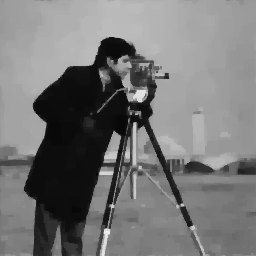

In [4]:
U=copy(f0);
Unew=copy(U)

h=1/size(U,1)
dt=0.5*h^2

for t=1:2500
   aROF2D_gradient_descent_step!(U,Unew, f0, h, dt, 0.02) 

   #Laplace2D_gradient_descent_step!(U,Unew, f0, h, dt, 0.01) 

   U.=Unew
end

colorview(Gray, U)

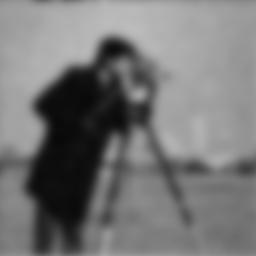

In [5]:
U=copy(f0);
Unew=copy(U)

h=1/size(U,1)
dt=0.5*h^2

for t=1:2500

   Laplace2D_gradient_descent_step!(U,Unew, f0, h, dt, 0.01) 

   U.=Unew
end

colorview(Gray, U)